In [213]:
import pandas as pd
df = pd.read_csv(r"C:\AI workforce\TCS\Retail_Transactions_2000.csv")
print(df.shape)        
    


(2000, 11)


In [99]:
df.info()    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    2000 non-null   object
 1   CustomerID       2000 non-null   object
 2   Gender           2000 non-null   object
 3   Age              2000 non-null   int64 
 4   City             2000 non-null   object
 5   ProductCategory  2000 non-null   object
 6   Quantity         2000 non-null   int64 
 7   Price            2000 non-null   int64 
 8   PurchaseDate     2000 non-null   object
 9   PaymentMode      2000 non-null   object
 10  TotalAmount      2000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


In [3]:
df.head()  

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123


In [4]:
df.isnull().sum()


TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

In [5]:
duplicates = df.duplicated().sum()
print(f"{duplicates}")

0


In [6]:
print(df['Gender'].unique())
print(df['City'].unique()[:10])       
print(df['PaymentMode'].unique())


['Female' 'Other' 'Male']
['Bengaluru' 'Pune' 'Hyderabad' 'Chennai' 'Delhi' 'Jaipur' 'Lucknow'
 'Ahmedabad' 'Kolkata' 'Mumbai']
['Cash' 'Card' 'Wallet' 'UPI']


In [7]:
#PART A 2
print("Missing Age:", df['Age'].isnull().sum())   #no missing values, so i did'nt use median

Missing Age: 0


In [8]:

print("Missing City:", df['City'].isnull().sum())



Missing City: 0


In [9]:
df.dropna(subset=['TransactionID', 'ProductCategory'], inplace=True)

DATA CLEANING:

Remove Duplicate Transactions

In [100]:
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.shape

Duplicate rows: 0


(2000, 11)

 Cleaning Gender


In [11]:
df['Gender'] = df['Gender'].str.strip().str.title()
df['Gender'].replace({
    'M': 'Male',
    'F': 'Female',
    'O': 'Other'
}, inplace=True)
df

C:\Users\HP\AppData\Local\Temp\ipykernel_14964\1633333599.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({


,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123
...,...,...,...,...,...,...,...,...,...,...,...
1995,T01996,C1151,Male,44,Jaipur,Fashion,2,2436,2023-01-15,Wallet,4872
1996,T01997,C5888,Male,53,Ahmedabad,Beauty,3,2744,2023-01-14,Wallet,8232
1997,T01998,C2758,Male,45,Lucknow,Electronics,1,3246,2023-06-19,Wallet,3246
1998,T01999,C6489,Male,43,Bengaluru,Sports,2,2709,2023-01-15,Wallet,5418


Cleaning City

In [12]:
df['City'] = df['City'].str.strip().str.title()

Cleaning ProductCategory


In [13]:
df['ProductCategory'] = df['ProductCategory'].str.strip().str.title()


Cleaning PaymentMode


In [14]:
df['PaymentMode'] = df['PaymentMode'].str.strip().str.upper()

Correcting values

In [15]:
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]


FEATURE EGINEERING
Derive TotalAmount if missing


In [208]:
df['TotalAmount'] = df['Quantity'] * df['Price']


cleaning date columns

In [218]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')
df['Month'] = df['PurchaseDate'].dt.month
df['DayOfWeek'] = df['PurchaseDate'].dt.day_name()



In [219]:
bins = [0, 17, 25, 40, 60, 100]  
labels = ['<18', '18-25', '26-40', '41-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

df


,TransactionID,CustomerID,Gender,Age,Quantity,Price,PurchaseDate,TotalAmount,City_Bengaluru,City_Chennai,...,ProductCategory_Fashion,ProductCategory_Furniture,ProductCategory_Groceries,ProductCategory_Sports,PaymentMode_Cash,PaymentMode_UPI,PaymentMode_Wallet,AgeGroup,Month,DayOfWeek
0,T00001,C2824,Female,33,3,1.402371,2023-03-15,1.074680,True,False,...,True,False,False,False,True,False,False,26-40,3,Wednesday
1,T00002,C1409,Other,20,5,-1.022646,2023-01-22,-0.359843,False,False,...,False,False,False,False,False,False,False,18-25,1,Sunday
2,T00003,C5506,Other,47,1,-1.687615,2023-04-18,-1.261723,False,False,...,False,True,False,False,False,False,True,41-60,4,Tuesday
3,T00004,C5012,Other,21,5,0.317905,2023-08-09,1.301377,False,False,...,False,False,True,False,True,False,False,18-25,8,Wednesday
4,T00005,C4657,Female,41,1,0.443117,2023-09-23,-0.733639,False,True,...,False,False,False,True,False,False,True,41-60,9,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,T01996,C1151,Male,44,2,-0.042876,2023-01-15,-0.426993,False,False,...,True,False,False,False,False,False,True,41-60,1,Sunday
1996,T01997,C5888,Male,53,3,0.175007,2023-01-14,0.162104,False,False,...,False,False,False,False,False,False,True,41-60,1,Saturday
1997,T01998,C2758,Male,45,1,0.530129,2023-06-19,-0.712074,False,False,...,False,False,False,False,False,False,True,41-60,6,Monday
1998,T01999,C6489,Male,43,2,0.150248,2023-01-15,-0.331265,True,False,...,False,False,False,True,False,False,True,41-60,1,Sunday


 Encoding & Transformation
 Encoding categorical values:



In [211]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender_Enc'] = le.fit_transform(df['Gender'])
print(df[['Gender', 'Gender_Enc']].head())


   Gender  Gender_Enc
0  Female           0
1   Other           2
2   Other           2
3   Other           2
4  Female           0


In [214]:
df = pd.get_dummies(df, 
                    columns=['City', 'ProductCategory', 'PaymentMode'], 
                    drop_first=True)


In [215]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Price', 'TotalAmount']] = scaler.fit_transform(df[['Price', 'TotalAmount']])



Final Verification

In [220]:
print(df.isnull().sum())
print((df['Quantity'] <= 0).sum())  
print((df['Price'] <= 0).sum())   
print(df.duplicated().sum())
df.to_csv("Retail_Cleaned.csv")

df1=pd.read_csv(r"C:\AI workforce\TCS\Retail_Cleaned.csv")
df1



TransactionID                  0
CustomerID                     0
Gender                         0
Age                            0
Quantity                       0
Price                          0
PurchaseDate                   0
TotalAmount                    0
City_Bengaluru                 0
City_Chennai                   0
City_Delhi                     0
City_Hyderabad                 0
City_Jaipur                    0
City_Kolkata                   0
City_Lucknow                   0
City_Mumbai                    0
City_Pune                      0
ProductCategory_Books          0
ProductCategory_Electronics    0
ProductCategory_Fashion        0
ProductCategory_Furniture      0
ProductCategory_Groceries      0
ProductCategory_Sports         0
PaymentMode_Cash               0
PaymentMode_UPI                0
PaymentMode_Wallet             0
AgeGroup                       0
Month                          0
DayOfWeek                      0
dtype: int64
0
1004
0


,Unnamed: 0,TransactionID,CustomerID,Gender,Age,Quantity,Price,PurchaseDate,TotalAmount,City_Bengaluru,...,ProductCategory_Fashion,ProductCategory_Furniture,ProductCategory_Groceries,ProductCategory_Sports,PaymentMode_Cash,PaymentMode_UPI,PaymentMode_Wallet,AgeGroup,Month,DayOfWeek
0,0,T00001,C2824,Female,33,3,1.402371,2023-03-15,1.074680,True,...,True,False,False,False,True,False,False,26-40,3,Wednesday
1,1,T00002,C1409,Other,20,5,-1.022646,2023-01-22,-0.359843,False,...,False,False,False,False,False,False,False,18-25,1,Sunday
2,2,T00003,C5506,Other,47,1,-1.687615,2023-04-18,-1.261723,False,...,False,True,False,False,False,False,True,41-60,4,Tuesday
3,3,T00004,C5012,Other,21,5,0.317905,2023-08-09,1.301377,False,...,False,False,True,False,True,False,False,18-25,8,Wednesday
4,4,T00005,C4657,Female,41,1,0.443117,2023-09-23,-0.733639,False,...,False,False,False,True,False,False,True,41-60,9,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,T01996,C1151,Male,44,2,-0.042876,2023-01-15,-0.426993,False,...,True,False,False,False,False,False,True,41-60,1,Sunday
1996,1996,T01997,C5888,Male,53,3,0.175007,2023-01-14,0.162104,False,...,False,False,False,False,False,False,True,41-60,1,Saturday
1997,1997,T01998,C2758,Male,45,1,0.530129,2023-06-19,-0.712074,False,...,False,False,False,False,False,False,True,41-60,6,Monday
1998,1998,T01999,C6489,Male,43,2,0.150248,2023-01-15,-0.331265,True,...,False,False,False,True,False,False,True,41-60,1,Sunday


PART B

In [174]:
df=pd.read_csv(r"C:\AI workforce\TCS\Retail_Transactions_2000.csv")

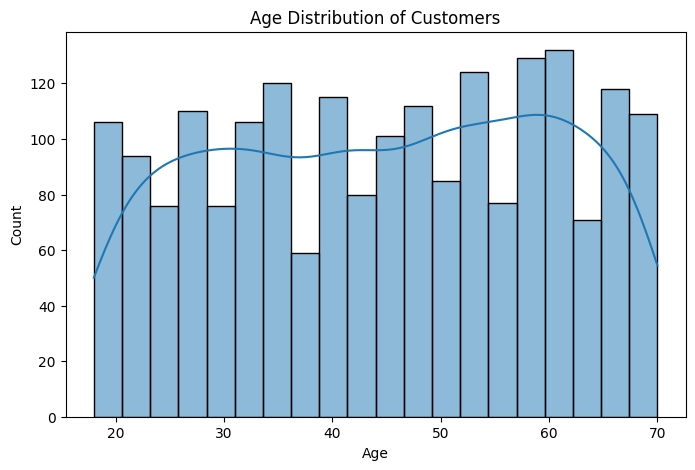

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True)  # kde=True draws smooth normal-like curve
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


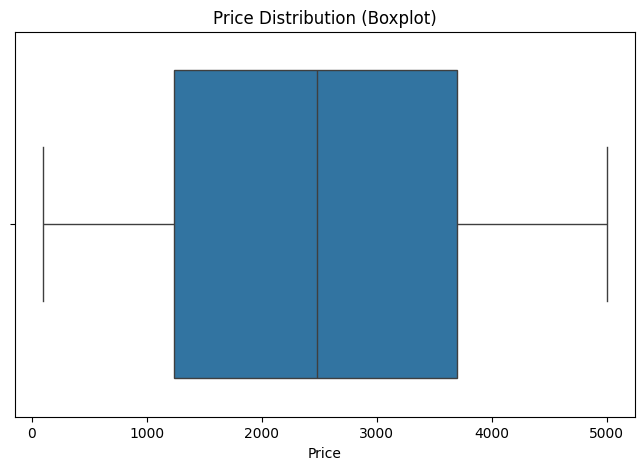

In [176]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Price'])
plt.title("Price Distribution (Boxplot)")
plt.show()




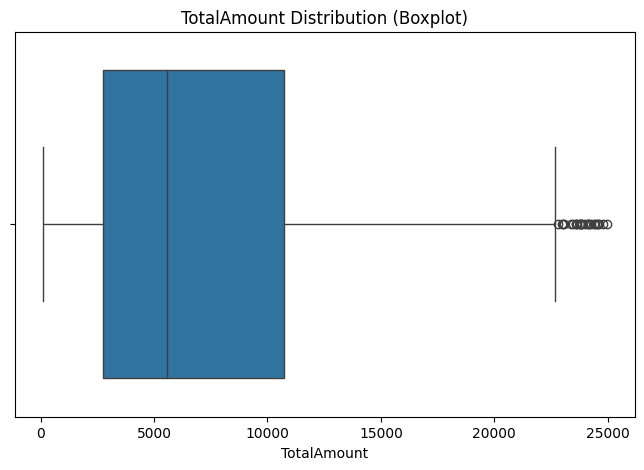

In [177]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['TotalAmount'])
plt.title("TotalAmount Distribution (Boxplot)")
plt.show()

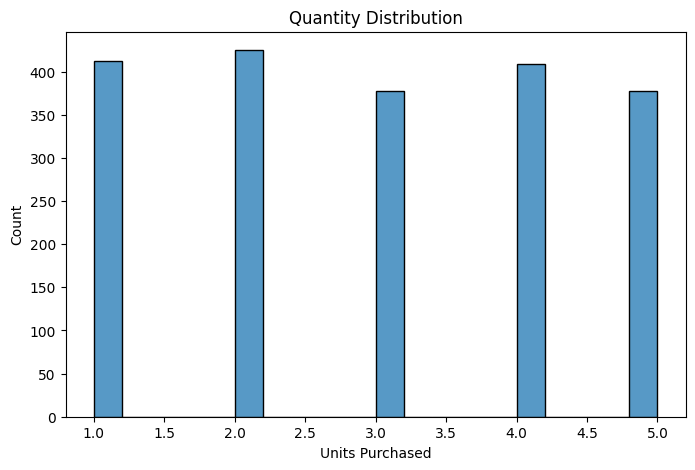

In [178]:
plt.figure(figsize=(8,5))
sns.histplot(df['Quantity'], bins=20, kde=False)
plt.title("Quantity Distribution")
plt.xlabel("Units Purchased")
plt.ylabel("Count")
plt.show()


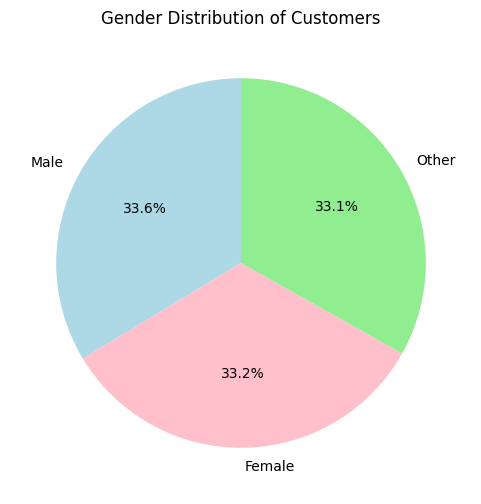

In [179]:
plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', 
                                     startangle=90, 
                                     colors=['lightblue','pink','lightgreen'])
plt.title("Gender Distribution of Customers")
plt.ylabel("")
plt.show()


In [180]:
df

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123
...,...,...,...,...,...,...,...,...,...,...,...
1995,T01996,C1151,Male,44,Jaipur,Fashion,2,2436,2023-01-15,Wallet,4872
1996,T01997,C5888,Male,53,Ahmedabad,Beauty,3,2744,2023-01-14,Wallet,8232
1997,T01998,C2758,Male,45,Lucknow,Electronics,1,3246,2023-06-19,Wallet,3246
1998,T01999,C6489,Male,43,Bengaluru,Sports,2,2709,2023-01-15,Wallet,5418


City
Ahmedabad    222
Bengaluru    217
Lucknow      213
Mumbai       202
Delhi        199
Jaipur       196
Kolkata      196
Chennai      187
Hyderabad    185
Pune         183
Name: count, dtype: int64


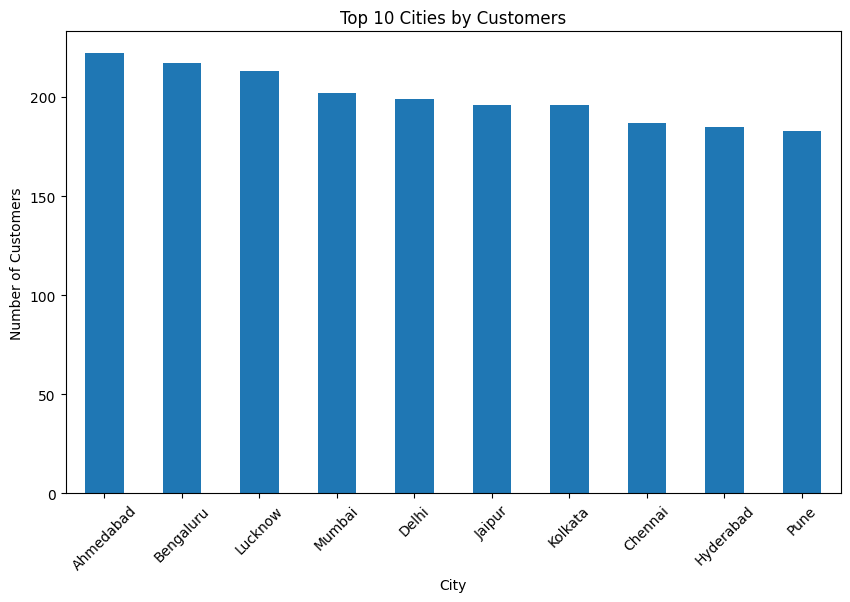

In [181]:
top10_cities = df['City'].value_counts().head(10)

print(top10_cities)  # Display in console


plt.figure(figsize=(10,6))
top10_cities.plot(kind='bar')

plt.title("Top 10 Cities by Customers")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


Sales Insights
   - Total sales by product category.
   - Monthly sales trend (line chart).
   - Payment mode usage (pie chart).


ProductCategory
Furniture      313
Beauty         303
Books          301
Electronics    281
Groceries      281
Sports         262
Fashion        259
Name: count, dtype: int64


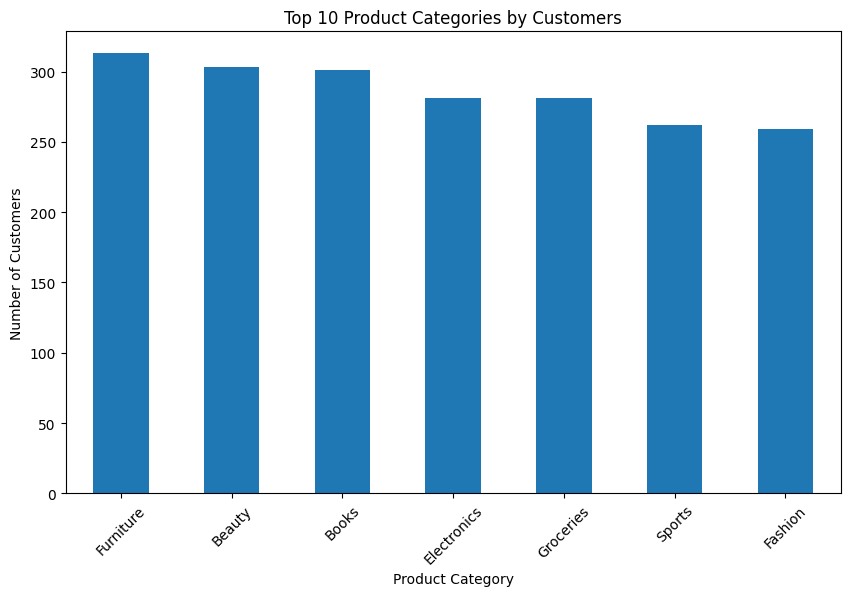

In [182]:

top10_categories = df['ProductCategory'].value_counts().head(10)

print(top10_categories) 

plt.figure(figsize=(10,6))
top10_categories.plot(kind='bar')

plt.title("Top 10 Product Categories by Customers")
plt.xlabel("Product Category")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


In [128]:
df['TotalAmount'] = df['Quantity'] * df['Price']



In [184]:

df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')
df['Month'] = df['PurchaseDate'].dt.month
df['DayOfWeek'] = df['PurchaseDate'].dt.day_name()



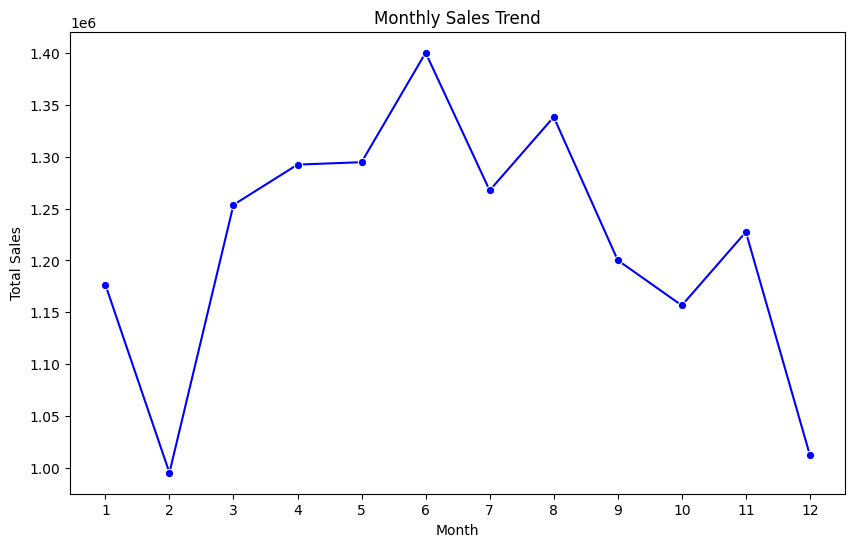

In [185]:
plt.figure(figsize=(10,6))

monthly_sales = df.groupby('Month')['TotalAmount'].sum()

sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color="blue")

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1,13))
plt.show()


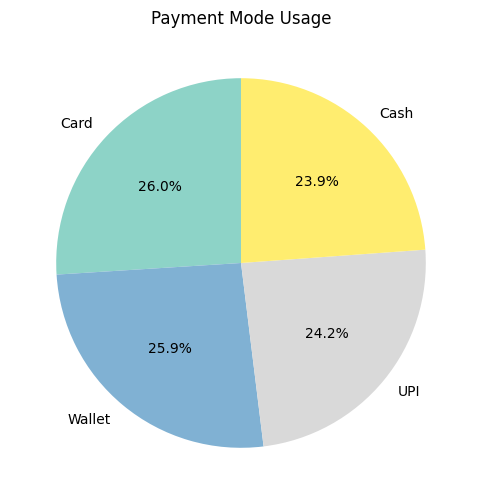

In [186]:
plt.figure(figsize=(6,6))

payment_usage = df['PaymentMode'].value_counts()

payment_usage.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')

plt.title("Payment Mode Usage")
plt.ylabel("")
plt.show()


In [192]:
bins = [0, 17, 25, 40, 60, 100]  
labels = ['<18', '18-25', '26-40', '41-60', '60+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_14964\1261535303.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend_age = df.groupby('AgeGroup')['TotalAmount'].mean()


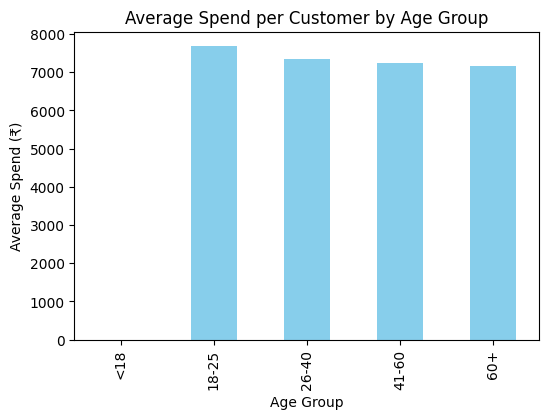

In [193]:
avg_spend_age = df.groupby('AgeGroup')['TotalAmount'].mean()

avg_spend_age.plot(kind='bar', color='skyblue', figsize=(6,4))
plt.title("Average Spend per Customer by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Spend (₹)")
plt.show()


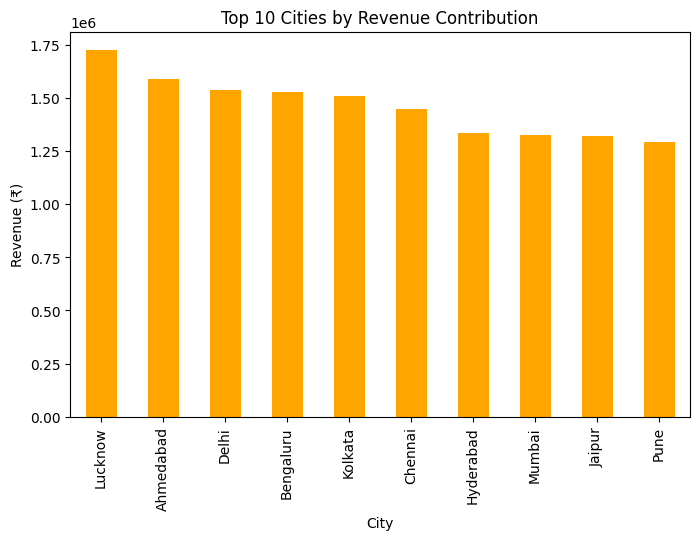

In [194]:
city_revenue = df.groupby('City')['TotalAmount'].sum().sort_values(ascending=False).head(10)

city_revenue.plot(kind='bar', figsize=(8,5), color='orange')
plt.title("Top 10 Cities by Revenue Contribution")
plt.xlabel("City")
plt.ylabel("Revenue (₹)")
plt.show()


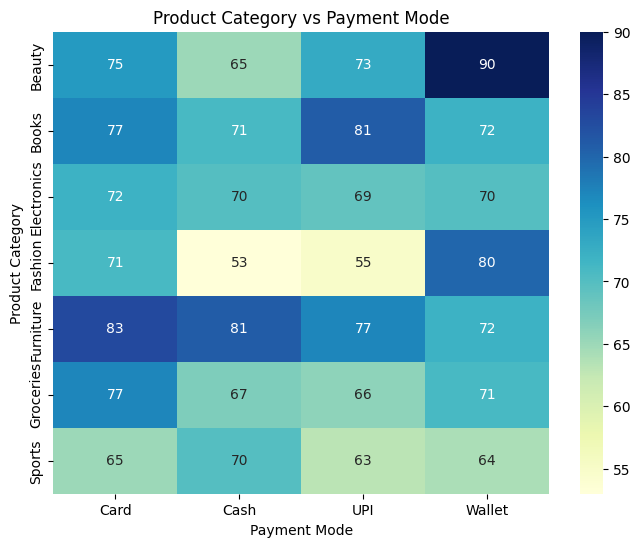

In [195]:
import seaborn as sns

heatmap_data = pd.crosstab(df['ProductCategory'], df['PaymentMode'])

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Product Category vs Payment Mode")
plt.xlabel("Payment Mode")
plt.ylabel("Product Category")
plt.show()


In [196]:
df

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Month,DayOfWeek,AgeGroup
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,3,Wednesday,26-40
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,1,Sunday,18-25
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,4,Tuesday,41-60
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,8,Wednesday,18-25
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,9,Saturday,41-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,T01996,C1151,Male,44,Jaipur,Fashion,2,2436,2023-01-15,Wallet,4872,1,Sunday,41-60
1996,T01997,C5888,Male,53,Ahmedabad,Beauty,3,2744,2023-01-14,Wallet,8232,1,Saturday,41-60
1997,T01998,C2758,Male,45,Lucknow,Electronics,1,3246,2023-06-19,Wallet,3246,6,Monday,41-60
1998,T01999,C6489,Male,43,Bengaluru,Sports,2,2709,2023-01-15,Wallet,5418,1,Sunday,41-60


In [207]:
df1

,Unnamed: 0,TransactionID,CustomerID,Gender,Age,Quantity,Price,PurchaseDate,TotalAmount,Month,...,City_Pune,ProductCategory_Books,ProductCategory_Electronics,ProductCategory_Fashion,ProductCategory_Furniture,ProductCategory_Groceries,ProductCategory_Sports,PaymentMode_Cash,PaymentMode_UPI,PaymentMode_Wallet
0,0,T00001,C2824,Female,33,3,1.402371,2023-03-15,1.074680,3,...,False,False,False,True,False,False,False,True,False,False
1,1,T00002,C1409,Other,20,5,-1.022646,2023-01-22,-0.359843,1,...,True,True,False,False,False,False,False,False,False,False
2,2,T00003,C5506,Other,47,1,-1.687615,2023-04-18,-1.261723,4,...,True,False,False,False,True,False,False,False,False,True
3,3,T00004,C5012,Other,21,5,0.317905,2023-08-09,1.301377,8,...,False,False,False,False,False,True,False,True,False,False
4,4,T00005,C4657,Female,41,1,0.443117,2023-09-23,-0.733639,9,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,T01996,C1151,Male,44,2,-0.042876,2023-01-15,-0.426993,1,...,False,False,False,True,False,False,False,False,False,True
1996,1996,T01997,C5888,Male,53,3,0.175007,2023-01-14,0.162104,1,...,False,False,False,False,False,False,False,False,False,True
1997,1997,T01998,C2758,Male,45,1,0.530129,2023-06-19,-0.712074,6,...,False,False,True,False,False,False,False,False,False,True
1998,1998,T01999,C6489,Male,43,2,0.150248,2023-01-15,-0.331265,1,...,False,False,False,False,False,False,True,False,False,True
